# Image Noise Reduction with Autoencoders.
# >>Firstly we will load the libraries that we need in this project:

In [1]:
import numpy as np
import matplotlib



# >>we are using mnist dataset;so lets import it



In [2]:
from tensorflow.keras.datasets import mnist



# >>In this dataset we have 60000 examples as Training set and 10000 examples as test set
# >>All the images are Handwritten and black&white in color,each of size 28x28
# >>we have labels as digits from 0-9



In [3]:
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model



# >>Now I will import layers,as I am going to create 2 Neural networks
# >>1.first neural network,will classify the handwritten examples
# >>2.second neural network,will denoise the input data and as a result we will see denoised images



In [4]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical


%matplotlib inline

# >>lets process the data
# >>load the data from mnist dataset



In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



# >>actual pixels range is (0-255)
# >>normalize the values in the range (0-1)
# >>we are dividing by 255 as it is the maximum pixel value



In [6]:
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.



# >>Training set:60000 examples with 28x28(784) 



In [7]:
x_train = np.reshape(x_train, (60000, 784))



# >>Test set:10000 examples with 28x28(784)



In [8]:
x_test = np.reshape(x_test, (10000, 784))

# >>let us add noise to the dataset as it contains no noise
# >>scaling is performed by multiplying with 0.9


In [9]:

x_train_noisy = x_train + np.random.rand(60000, 784) * 0.9
x_test_noisy = x_test + np.random.rand(10000, 784) * 0.9



# >>0. and 1. actually represents floating point values



In [10]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# >>lets now create a plot func to plot the images
# >>By default we are making labels as false unless mentioned



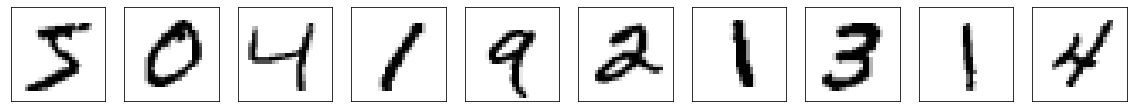

In [11]:
def plot(x, p, labels = False):
    plt.figure(figsize=(20,2))
    #lets try to plot 10 images
    for i in range(10):
        plt.subplot(1,10,i+1)
        #1 row,10 col,index starts by one so add 1 to i
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        #we already flattend ,so reshape into 28x28
        #here cmap is set to 'binary' to see black and white images
        #removing xticks and yticks
        plt.xticks([])
        plt.yticks([])
        #if labels is set to true ,then labels are printed below the images
        #if predictions are passed,those will be displayed as labels of images
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()   #to display entire plot
    return
plot(x_train, None) #lets print the training images

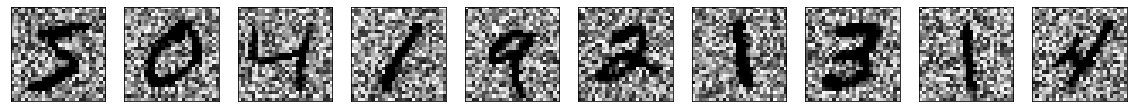

In [12]:
plot(x_train_noisy, None) #lets print the images to which we added noise

# >>now we will build a classifier and train it
# >>we will be using two dense layers here with 256 nodes each and activation as 'rectified linear unit'
# >>In output layer we will be having 10 nodes which actually says what label and for activation we use 'softmax' as we will have probabilities 
# >>Sequential is as class from Keras



In [13]:
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])



# >>here we will use optimizer='adam' which means adapter momentum estimate
# >>it just works like RMS where momentum is added to that



In [14]:
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train, y_train, epochs=3, batch_size=512)

print('classifier is trained on the training dataset')

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4143 - accuracy: 0.8877
Epoch 2/3
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1492 - accuracy: 0.9570
Epoch 3/3
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1023 - accuracy: 0.9701
classifier is trained on the training dataset


In [15]:
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

10000/10000 [==============================] - 1s 78us/sample - loss: 0.0942 - accuracy: 0.9712
0.9712


In [16]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

10000/10000 [==============================] - 1s 61us/sample - loss: 8.6320 - accuracy: 0.1754
0.1754


# >>Autoencoder
# >>takes noisy data as input


In [17]:
input_image = Input(shape=(784,))



# >>Here we used 64 because our autoencoder should focus only on the important stuff
# >>It should ignore the data that is not important



In [18]:
encoded = Dense(64, activation='relu')(input_image)
 
   

 # >>values are converged to 0 and 1 ,so now lets use sigmoid as activation 


In [19]:
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# >>Train auto encoder
# >>Batchsize is 512 as it will speed up the training process



In [20]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100, batch_size=512,
    validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print('Hurray we have completed trainig!')

0.258 _ 0.225 _ 0.196 _ 0.178 _ 0.167 _ 0.157 _ 0.150 _ 0.144 _ 0.138 _ 0.133 _ 0.129 _ 0.126 _ 0.123 _ 0.121 _ 0.119 _ 0.117 _ 0.116 _ 0.114 _ 0.113 _ 0.112 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.102 _ 0.103 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _  _ 
Hurray we have completed trainig!


In [21]:
#lets see the denoised images
preds = autoencoder.predict(x_test_noisy)

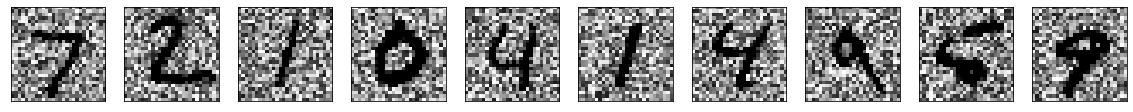

In [22]:
plot(x_test_noisy, None) #noisy images

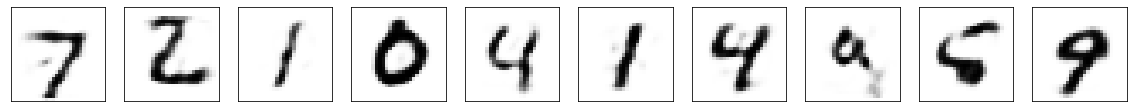

In [23]:
plot(preds, None) #denoised images

In [24]:
loss, acc = classifier.evaluate(preds, y_test)
print(acc)
# now we have accuracy greater than 94

10000/10000 [==============================] - 1s 72us/sample - loss: 0.1521 - accuracy: 0.9532
0.9532


In [25]:
# let us create a composite model
input_image=Input(shape=(784,))
x=autoencoder(input_image)
y=classifier(x)
denoise_and_classify=Model(input_image,y) #model

In [26]:
predictions=denoise_and_classify.predict(x_test_noisy)

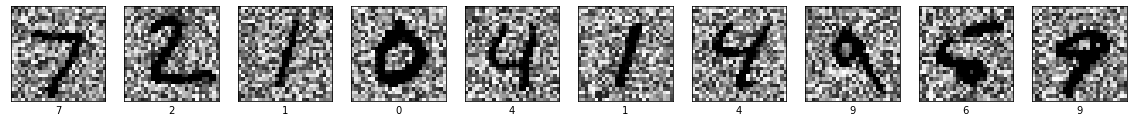

In [27]:
plot(x_test_noisy,predictions,True)

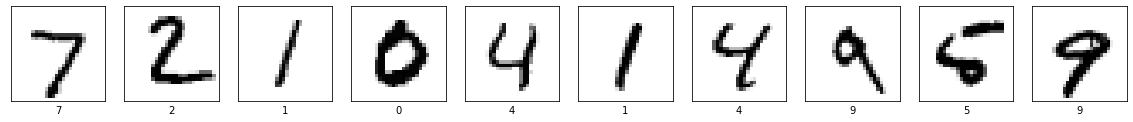

In [28]:
plot(x_test,to_categorical(y_test),True)